# Model Selection and Predict with Python

### Description:
**In this Notebook it will describe the creation and selection process of a survival prediction model based on the Titanic sink data.**

### Targets:
* Perform an Extraction, Transformation and Loading of data to be used.
* Discovery of features correlated to prediction labels.
* Find the best model and fit for label prediction.
* Obtain the best predictions possible.

## 1. Library importation

In [38]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler as SS
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.metrics import classification_report as cr
from sklearn.linear_model import LogisticRegression as LogR
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV as GSCV

## 2. Load and Information of the Data

In [39]:
train = pd.read_csv("titanic_train.csv")
test = pd.read_csv("titanic_test.csv")

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Description of Data Fields

* Survival - Survival. 0 = No, 1 = Yes
* Pclass - Ticket class. 1 = 1st, 2 = 2nd, 3 = 3rd
* Sex - Sex.
* Age - Age in years.
* SibSp - Number of siblings / spouses aboard the Titanic.
* Parch - Number of parents / children aboard the Titanic.
* Ticket - Ticket number.
* Fare - Passenger fare.
* Cabin - Cabin number.
* Embarked - Port of Embarkation. C = Cherbourg, Q = Queenstown, S = Southampton

## 3. Exploratory Data Analysis

[Text(0.5, 1.0, 'Existent data (purple) and missing data (yellow) ratio')]

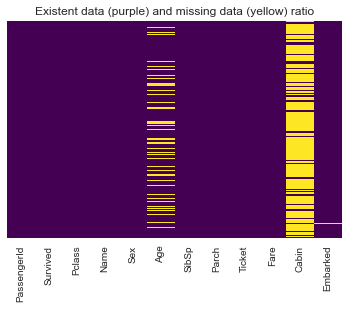

In [10]:
# Detection of missing data.
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis').set(title = 'Existent data (purple) and missing data (yellow) ratio')

[Text(0.5, 1.0, 'Count of Survivors')]

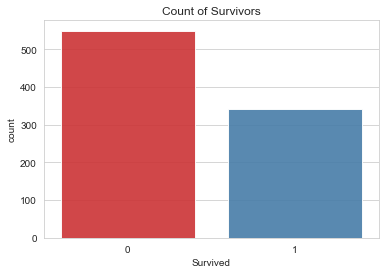

In [6]:
sns.countplot(x='Survived',data=train,palette='Set1', alpha=0.9).set(title = 'Count of Survivors')

[Text(0.5, 1.0, 'Survivors per sex')]

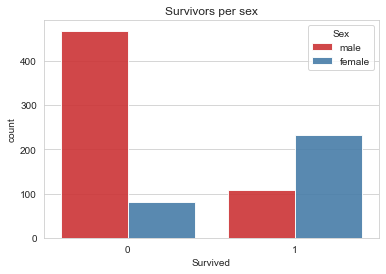

In [7]:
sns.countplot(x='Survived', hue='Sex', data=train, palette='Set1', alpha=0.9).set(title = 'Survivors per sex')

[Text(0.5, 1.0, 'Survivors per class ticket')]

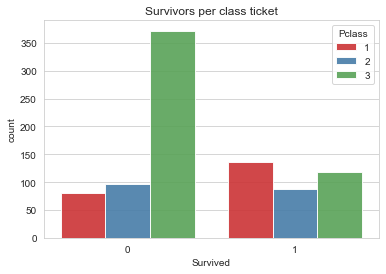

In [8]:
sns.countplot(x='Survived', hue='Pclass', data=train, palette='Set1', alpha=0.9).set(title = 'Survivors per class ticket')

[Text(0.5, 1.0, 'People Ages Count')]

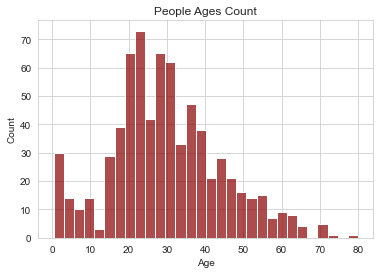

In [9]:
sns.histplot(train['Age'].dropna(), kde=False, color='darkred', bins=30, alpha=0.7).set(title = 'People Ages Count')

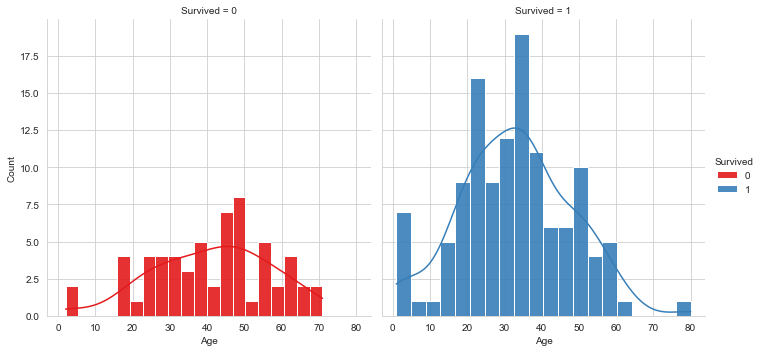

In [10]:
g = sns.FacetGrid(data=train.dropna(), col='Survived', palette='Set1', hue='Survived', height=5)
g.map(sns.histplot, 'Age', kde=True, bins=20, alpha=0.9)
g.add_legend()

[Text(0.5, 1.0, 'Survivors per number of siblings / spouses aboard the Titanic')]

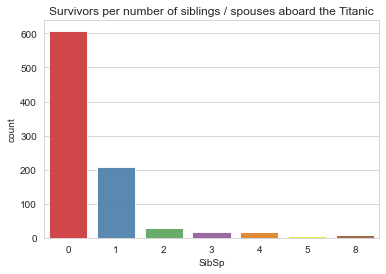

In [11]:
sns.countplot(x='SibSp',data=train, palette='Set1', alpha=0.9).set(title = 'Survivors per number of siblings / spouses aboard the Titanic')

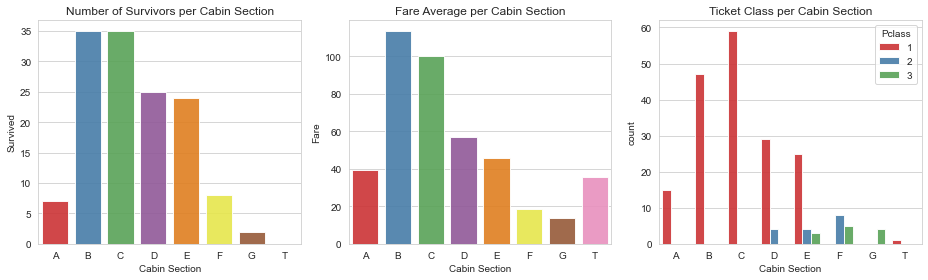

In [12]:
a = []
for i in train['Cabin'].dropna():
    a.append(i[0])

    
cabin = train[['Survived', 'Fare', 'Pclass', 'Cabin']].dropna()[['Survived', 'Fare', 'Pclass']]
cabin['Cabin Section'] = a
survivals = cabin.groupby('Cabin Section').sum()['Survived'].reset_index()
fares = cabin.groupby('Cabin Section').mean()['Fare'].reset_index()
classes = cabin[['Pclass', 'Cabin Section']].sort_values(by=['Cabin Section'])


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(13,4))

# Cabin Section vs Survivors
axes[0].set_title('Number of Survivors per Cabin Section')
sns.barplot(ax=axes[0], data=survivals, x='Cabin Section', y='Survived', palette='Set1', alpha=0.9)

# Cabin Section vs Fare
axes[1].set_title('Fare Average per Cabin Section')
sns.barplot(ax=axes[1], data=fares, x='Cabin Section', y='Fare', palette='Set1', alpha=0.9)

# Cabin Section vs Pclass
axes[2].set_title('Ticket Class per Cabin Section')
sns.countplot(ax=axes[2], data=classes, x='Cabin Section', hue='Pclass', palette='Set1', alpha=0.9)
plt.legend(loc='upper right', title='Pclass')

plt.tight_layout()

## 4. Data Cleaning 

[Text(0.5, 1.0, 'Existent data (purple) and missing data (yellow) ratio')]

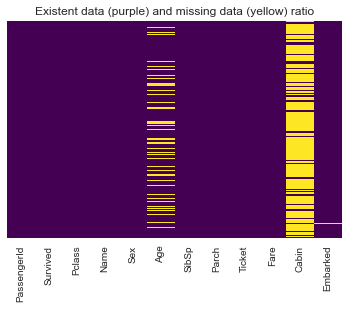

In [13]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis').set(title = 'Existent data (purple) and missing data (yellow) ratio')

### 4.1 Age column

[Text(0.5, 1.0, 'Box Plot of Ages regard to the Ticket Class')]

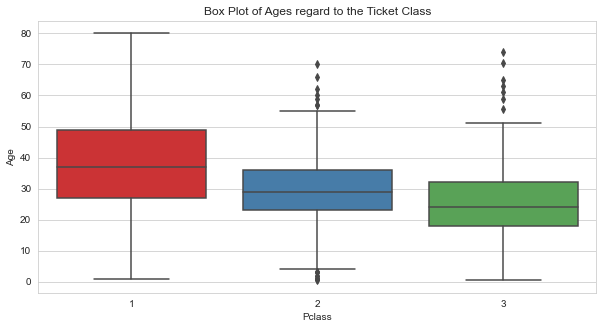

In [14]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Pclass', y='Age', data=train, palette='Set1').set(title = 'Box Plot of Ages regard to the Ticket Class')

In [15]:
train.groupby('Pclass').mean().round()['Age']

Pclass
1    38.0
2    30.0
3    25.0
Name: Age, dtype: float64

In [11]:
def fill_age(cols):
    """
    Imputation function for the column 'Age' regard to the average ages for each ticket class.
    """
    age = cols[0]
    p_class = cols[1]
    
    if pd.isnull(age):
        if p_class == 1:
            return 38
        elif p_class == 2:
            return 30
        else:
            return 25
    else:
        return age

In [12]:
# Imputation of the "Age" column.
train['Age'] = train[['Age','Pclass']].apply(fill_age, axis=1)

### 4.2 Cabin column

[Text(0.5, 1.0, 'Existent data (purple) and missing data (yellow) ratio')]

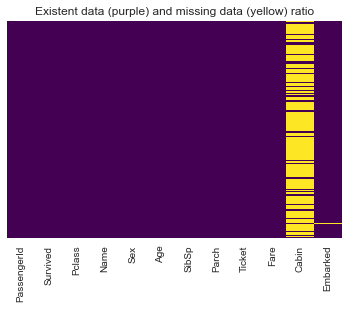

In [18]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis').set(title = 'Existent data (purple) and missing data (yellow) ratio')

[Text(0.5, 1.0, 'Existent data (purple) and missing data (yellow) ratio')]

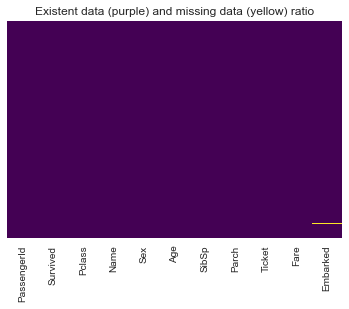

In [13]:
# Elimination the "Cabin" column.
train.drop('Cabin', axis=1, inplace=True)
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis').set(title = 'Existent data (purple) and missing data (yellow) ratio')

### 4.3 Embarked column

[Text(0.5, 1.0, 'Existent data (purple) and missing data (yellow) ratio')]

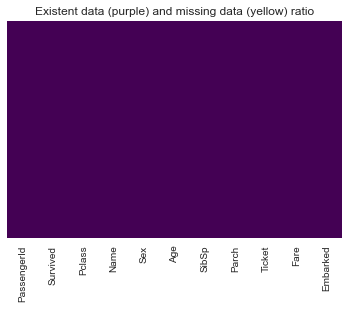

In [14]:
# Elimination of the missing datum in the Emkarked row.
train.dropna(inplace=True)
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis').set(title = 'Existent data (purple) and missing data (yellow) ratio')

In [21]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## 5. Converting Categorical Features

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [15]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
embarked = pd.get_dummies(train['Embarked'], drop_first=True)

In [16]:
train = pd.concat([train, sex, embarked],axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [17]:
train.drop(['Name', 'Sex', 'Ticket', 'Embarked'], axis=1, inplace=True)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


## 6. Building Models 

### 6.1 Data split 

In [18]:
x = train.drop(['PassengerId', 'Survived'], axis=1)
y = train['Survived']

def datasplit(x, y):
    """
    Function for data splitting.
    """
    x_train, x_test, y_train, y_test = tts(x, y, test_size=0.33, random_state=101)

### 6.2 Logistic Model 

Loggist Model
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       163
           1       0.85      0.70      0.77       104

    accuracy                           0.84       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.84      0.84      0.83       267

Confusion Matrix:


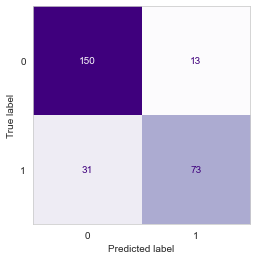

In [181]:
log_model = Pipeline(steps=[('datas_plitting', datasplit(x,y)),
                            ('logistic_regression', LogR(max_iter=1000))])

log_model.fit(x_train, y_train)
log_pred = log_model.predict(x_test)

print('Loggist Model')
cmd.from_predictions(y_test, log_pred, colorbar = False, cmap = 'Purples')
plt.grid(False)
print(cr(y_test,log_pred))
print('Confusion Matrix:')


### 6.3 K-Nearest Neighbors

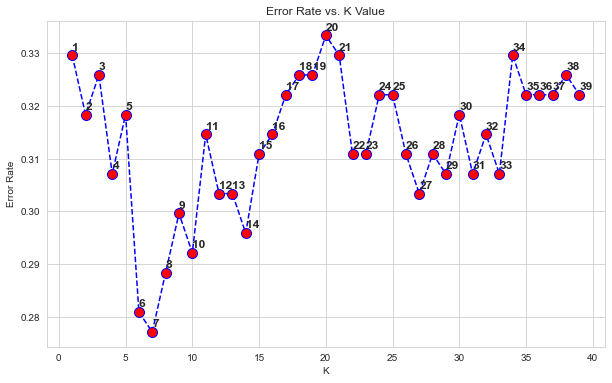

In [81]:
# Search for the optimum "n_neighbors" value.
error_rate = []
datasplit(x, y)
for i in range (1, 40):
    knn_i = KNC(n_neighbors= i)
    knn_i.fit(x_train, y_train)
    pred_i = knn_i.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))
    

fig, ax = plt.subplots(figsize=(10,6))
i = range(1,40)
j = error_rate
plt.plot(i, j, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
for k in range(len(i)):
    ax.text(i[k]+0.002, j[k]+0.001, i[k], size=12, fontweight ='bold')

In [91]:
# Election of "n_neighbors" regard to the first stable values.
n_neighbors = 13
a = n_neighbors

knn = Pipeline(steps=[('datas_plitting', datasplit(x, y)),
                      ('standard_scaler', SS()),
                      ('knearest_neighbors', KNC(a))])

knn.fit(x_train, y_train)
neigh_pred = knn.predict(x_test)

print('\n')
print('K-Neighbors Classifier Model')
print('n-neighbors =', a)
print(cm(y_test,neigh_pred))
print(cr(y_test,neigh_pred))



K-Neighbors Classifier Model
n-neighbors = 13
[[154   9]
 [ 29  75]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       163
           1       0.89      0.72      0.80       104

    accuracy                           0.86       267
   macro avg       0.87      0.83      0.84       267
weighted avg       0.86      0.86      0.85       267



### 6.4 Decision Tree

In [101]:
tree = Pipeline(steps=[('datas_plitting', datasplit(x, y)),
                       ('standard_scaler', SS()),
                       ('decision_tree', DTC(max_depth=3, random_state=2018))])

tree.fit(x_train, y_train)
tree_pred = tree.predict(x_test)

print('Decision Tree Model')
print(cm(y_test, tree_pred))
print(cr(y_test, tree_pred))

Decision Tree Model
[[150  13]
 [ 28  76]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       163
           1       0.85      0.73      0.79       104

    accuracy                           0.85       267
   macro avg       0.85      0.83      0.83       267
weighted avg       0.85      0.85      0.84       267



### 6.5 Random Forest

In [164]:
forest = Pipeline(steps=[('datas_plitting', datasplit(x, y)),
                         ('standard_scaler', SS()),
                         ('random_forest', RFC(n_estimators=1000, max_depth=3, random_state=2018))])

forest.fit(x_train, y_train)
forest_pred = forest.predict(x_test)

print('Radom Forest Model')
print(cm(y_test, forest_pred))
print(cr(y_test, forest_pred))

Radom Forest Model
[[156   7]
 [ 39  65]]
              precision    recall  f1-score   support

           0       0.80      0.96      0.87       163
           1       0.90      0.62      0.74       104

    accuracy                           0.83       267
   macro avg       0.85      0.79      0.81       267
weighted avg       0.84      0.83      0.82       267



### 6.6 Support Vector Machines

In [154]:
# Gridserch criteria
param_grid = {'vector_machines__C': [0.1,1, 10, 100, 1000], 'vector_machines__gamma': [1,0.1,0.01,0.001,0.0001], 'vector_machines__kernel': ['rbf']}


vector = Pipeline(steps=[('datas_plitting', datasplit(x, y)),
                         ('standard_scaler', SS()),
                         ('vector_machines', SVC())])

# Gridsearch
grid_vector = GSCV(vector, param_grid, refit=True, verbose=3)

grid_vector.fit(x_train, y_train)
vector_pred = grid_vector.predict(x_test)

print('\n')
print('Support Vector Machines Model')
print('Best param in "C": ', grid_vector.best_params_['vector_machines__C'])
print('Best param in "gamma": ', grid_vector.best_params_['vector_machines__gamma'])
print('Best param in "kernel": ', grid_vector.best_params_['vector_machines__kernel'])
print(cm(y_test, vector_pred))
print(cr(y_test, vector_pred))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END vector_machines__C=0.1, vector_machines__gamma=1, vector_machines__kernel=rbf;, score=0.672 total time=   0.0s
[CV 2/5] END vector_machines__C=0.1, vector_machines__gamma=1, vector_machines__kernel=rbf;, score=0.656 total time=   0.0s
[CV 3/5] END vector_machines__C=0.1, vector_machines__gamma=1, vector_machines__kernel=rbf;, score=0.637 total time=   0.0s
[CV 4/5] END vector_machines__C=0.1, vector_machines__gamma=1, vector_machines__kernel=rbf;, score=0.653 total time=   0.0s
[CV 5/5] END vector_machines__C=0.1, vector_machines__gamma=1, vector_machines__kernel=rbf;, score=0.653 total time=   0.0s
[CV 1/5] END vector_machines__C=0.1, vector_machines__gamma=0.1, vector_machines__kernel=rbf;, score=0.736 total time=   0.0s
[CV 2/5] END vector_machines__C=0.1, vector_machines__gamma=0.1, vector_machines__kernel=rbf;, score=0.832 total time=   0.0s
[CV 3/5] END vector_machines__C=0.1, vector_machines__gamma=0.1, v

[CV 3/5] END vector_machines__C=10, vector_machines__gamma=0.001, vector_machines__kernel=rbf;, score=0.782 total time=   0.0s
[CV 4/5] END vector_machines__C=10, vector_machines__gamma=0.001, vector_machines__kernel=rbf;, score=0.766 total time=   0.0s
[CV 5/5] END vector_machines__C=10, vector_machines__gamma=0.001, vector_machines__kernel=rbf;, score=0.839 total time=   0.0s
[CV 1/5] END vector_machines__C=10, vector_machines__gamma=0.0001, vector_machines__kernel=rbf;, score=0.728 total time=   0.0s
[CV 2/5] END vector_machines__C=10, vector_machines__gamma=0.0001, vector_machines__kernel=rbf;, score=0.712 total time=   0.0s
[CV 3/5] END vector_machines__C=10, vector_machines__gamma=0.0001, vector_machines__kernel=rbf;, score=0.702 total time=   0.0s
[CV 4/5] END vector_machines__C=10, vector_machines__gamma=0.0001, vector_machines__kernel=rbf;, score=0.710 total time=   0.0s
[CV 5/5] END vector_machines__C=10, vector_machines__gamma=0.0001, vector_machines__kernel=rbf;, score=0.70

## 7. Conclusion

* In comparison, the **K-Nearest Neighbors** obtained the best scores among the 5 models performed..
* This model will be used to predict de submission results.

## 8. Submission Results

* It will be repeated the same cleaning data process on the "test" data and predict the interest labels with the specificated model and its fits.

In [183]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [185]:
test.groupby('Pclass').mean().round()['Age']

Pclass
1    41.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [19]:
def fill_age_2(cols):
    """
    Imputation function for the column 'Age' regard to the average ages for each ticket class.
    """
    age = cols[0]
    p_class = cols[1]
    
    if pd.isnull(age):
        if p_class == 1:
            return 41
        elif p_class == 2:
            return 29
        else:
            return 24
    else:
        return age

In [20]:
test['Age'] = test[['Age','Pclass']].apply(fill_age_2, axis=1)

In [21]:
test.drop('Cabin', axis=1, inplace=True)

In [22]:
test.dropna(inplace=True)

In [23]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [24]:
sex = pd.get_dummies(test['Sex'], drop_first=True)
embarked = pd.get_dummies(test['Embarked'], drop_first=True)
test = pd.concat([test, sex, embarked],axis=1)

In [25]:
test.drop(['Name', 'Sex', 'Ticket', 'Embarked'], axis=1, inplace=True)

In [26]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [27]:
x_final = test.drop(['PassengerId'], axis=1)

In [28]:
x_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  417 non-null    int64  
 1   Age     417 non-null    float64
 2   SibSp   417 non-null    int64  
 3   Parch   417 non-null    int64  
 4   Fare    417 non-null    float64
 5   male    417 non-null    uint8  
 6   Q       417 non-null    uint8  
 7   S       417 non-null    uint8  
dtypes: float64(2), int64(3), uint8(3)
memory usage: 20.8 KB


In [29]:
x_final.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


In [31]:
scaler = SS()
scaler.fit(x)
scaled_features = scaler.transform(x)

x_train, x_test, y_train, y_test = tts(scaled_features, y, test_size=0.33, random_state=101)

n_neighbors = 13
a = n_neighbors

knn_f = KNC(a)
knn_f.fit(x_train, y_train)

scaler = SS()
scaler.fit(x_final)
scaled_features_f = scaler.transform(x_final)

final_pred = knn_f.predict(scaled_features_f)

## 9. Submission

In [37]:
submission = pd.DataFrame()
submission['PassengerId'] = test['PassengerId']
submission['Survived'] = final_pred
submission.to_csv('Model_S&P.csv', index=False)